# Analyze Deformed Tadpole Output from Trex
This notebook takes output data from the [Trex](https://github.com/mooch443/trex) compute vision tool and runs exploratory data analysis on the information provided for each tadpole.

### Set Parameters for Analysis

In [16]:
TREX_OUTPUT_DATA_PATH = "/Users/jstremme/Videos/data/"
COLLISION_THRESHOLD = 0.1

### Install Required Libraries

In [17]:
!pip install -q numpy
!pip install -q pandas
!pip install -q matplotlib

### Import Installed Libraries

In [18]:
# Built-In
import glob
import random

# External
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Print External Library Versions for Reproducibility

In [19]:
np.__version__

'1.19.5'

In [20]:
pd.__version__

'1.3.1'

In [21]:
mpl.__version__

'3.4.2'

### View Tadpole Data Files

In [22]:
all_tadpole_data_files = glob.glob(TREX_OUTPUT_DATA_PATH + '*.npz')

In [23]:
all_tadpole_data_files

['/Users/jstremme/Videos/data/black-pebble_tadpole12.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole13.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole11.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole10.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole9.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole28.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole14.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole15.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole29.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole8.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole17.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole16.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole6.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole27.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole26.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole7.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole5.npz',
 '

### Show Available Tadpole Data for a Random Tadpole
The `sample_tadpole_data` object contains information available for a single tadpole tracked by Trex.

In [24]:
sample_tadpole_data_files = random.choice(all_tadpole_data_files)
sample_tadpole_data = np.load(sample_tadpole_data_files)

In [25]:
sample_tadpole_data.files

['segment_length',
 'normalized_midline',
 'missing',
 'midline_y',
 'Y',
 'midline_x',
 'ANGULAR_A#centroid',
 'SPEED#smooth#wcentroid',
 'X',
 'MIDLINE_OFFSET',
 'midline_length',
 'VY',
 'time',
 'num_pixels',
 'VX',
 'BORDER_DISTANCE#pcentroid',
 'SPEED#wcentroid',
 'AY',
 'frame',
 'SPEED#pcentroid',
 'Y#wcentroid',
 'X#wcentroid',
 'AX',
 'SPEED',
 'ANGULAR_V#centroid',
 'ANGLE',
 'ACCELERATION#wcentroid',
 'timestamp',
 'ACCELERATION#pcentroid',
 'frame_segments',
 'segment_vxys']

### View Sample Tadpole Positions at Each Timestamp

In [26]:
sample_position_df = pd.DataFrame({
    'timestamp': sample_tadpole_data['timestamp'],
    'X': sample_tadpole_data['X'],
    'Y': sample_tadpole_data['Y']
})

In [27]:
sample_position_df

,timestamp,X,Y
0,0.000000e+00,26.256382,15.412910
1,3.448200e+04,26.269291,15.433016
2,6.896500e+04,26.270287,15.401534
3,1.034480e+05,26.259804,15.411260
4,1.379310e+05,26.255091,15.422773
...,...,...,...
37933,1.308034e+09,11.822406,5.056080
37934,1.308069e+09,12.054985,5.123625
37935,1.308103e+09,11.766475,4.853435
37936,1.308138e+09,11.846485,4.951276


### Review and Drop Frames with Infinite X, Y Values

In [28]:
sample_position_df.shape

(37938, 3)

In [29]:
sample_position_df.replace([np.inf, -np.inf], np.nan, inplace=True)
sample_position_df.dropna(inplace=True)

In [30]:
sample_position_df.shape

(30921, 3)

### Plot Coordinates in Time for Non-Missing Frames
We could plot all tadpoles with different colors on the same 3D graph, maybe with mpld3 or another tool that allows for close inspection.

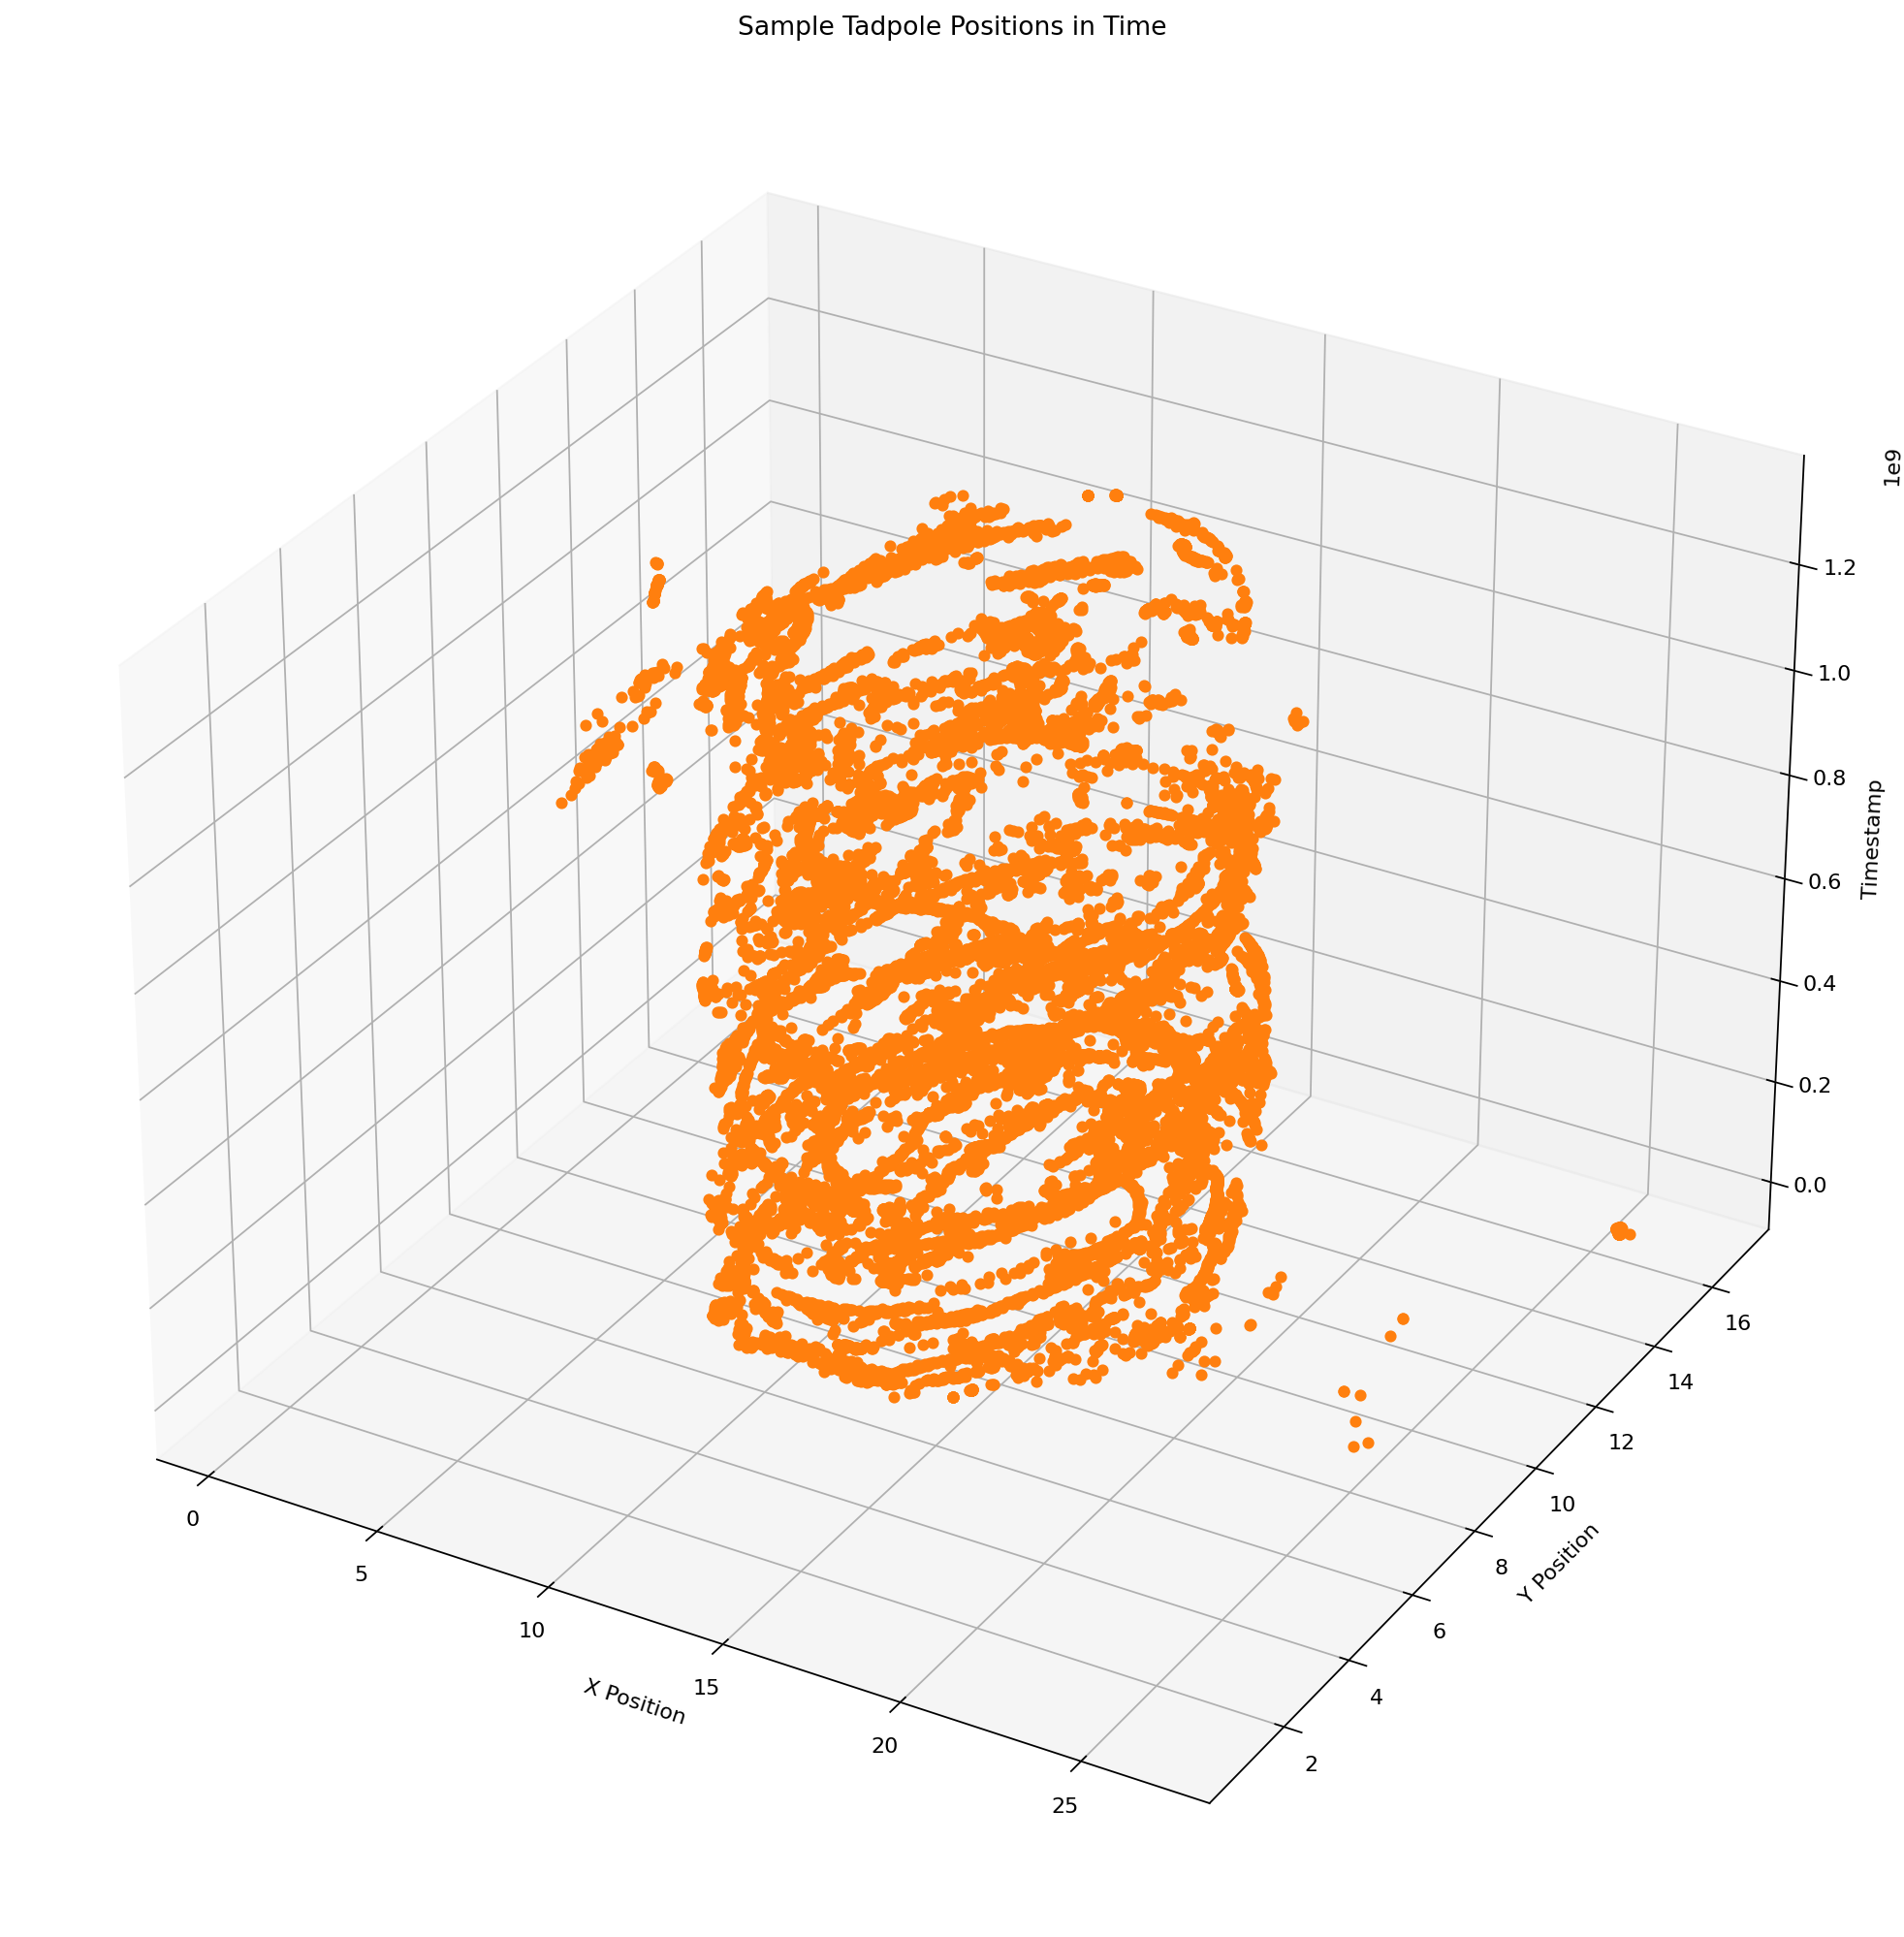

In [31]:
fig = plt.figure(figsize=(16, 16), dpi=160)
ax = fig.add_subplot(projection='3d')

for record in sample_position_df.iterrows():
    xs = record[1]['X']
    ys = record[1]['Y']
    zs = record[1]['timestamp']
    ax.scatter(xs, ys, zs, marker='o', c='#ff7f0e')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Timestamp')

plt.title('Sample Tadpole Positions in Time')
plt.show()

### Compute Time Increment

In [41]:
increment = sample_tadpole_data['timestamp'][1] - sample_tadpole_data['timestamp'][0]

In [42]:
increment

34482.0

### Create Global Time Dataframe
Times don't naturally align, as some timestampare missing for some tadpoles, so we find the min and max timestamp across all tadpole data.  We incremement the global timestamp based on the difference between each timestamp across data samples.

In [ ]:
# Start with 0s for min and max
# iterate through data to find global min and max
global_min, global_max = 0, 0
for i, tadpole_file in enumerate(all_tadpole_data_files):
    
    # Load tadpole data
    tadpole_data = np.load(tadpole_file)
    
    # Compute min recorded time for tadpole
    # set as global min if smaller than previous global min
    tadpole_min = np.min(tadpole_data['timestamp'])
    if tadpole_min < global_min:
        global_min = tadpole_min
    
    # Compute max recorded time for tadpole
    # set as global max if bigger than previous global max
    tadpole_max = np.max(tadpole_data['timestamp'])
    if tadpole_max > global_max:
        global_max = tadpole_max

# Create global time dataframe
global_df = pd.DataFrame({'timestamp': range(global_min, global_max, INCREMENT)})

In [ ]:
global_min

In [ ]:
global_max

### Create Dataframe of Locations of All Tadpoles

In [ ]:
for i, tadpole_file in enumerate(all_tadpole_data_files):
    
    # Retrieve tadpole name from file
    tadpole_name = tadpole_file.split('/')[-1].split('tadpole')[-1].split('.')[0]
    
    # Load tadpole data
    tadpole_data = np.load(tadpole_file)
    
    # Create tadpole dataframe
    tadpole_df = pd.DataFrame({
        f'{tadpole_name}_time': tadpole_data['timestamp'],
        f'{tadpole_name}_X': tadpole_data['X'],
        f'{tadpole_name}_Y': tadpole_data['Y']
    })
    
    # Join tadpole dataframe to global time dataframe
    pd.merge(global_df, tadpole_df, left_on='time', right_on=f'{tadpole_name}_time', how='inner')

### View Sample of All Tadpole Data

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(global_df.sample(n=50))

### Compute Collisions
There are smart ways to go about this by bucketing or saving previous positions as we iterate through comparisons.  For now, let's just define what a collision is.  We'll need some logic to iterate through pairs of tadpoles at a given frame and call the `compute_collisions` function. We can then parallel process these pairwise comparisons across all frames using something like ray.

Consider other ways to handle inf values.

In [ ]:
def compute_collisions(a, b):
    """
    Return 1 if coordiantes a and b represent a collision,
    otherise return 0.
    """
    
    # If one coordinate contains an infinite value
    # don't count this coordiante pair as a collision
    if np.inf in a or np.inf in b:
        return 0
    
    # Compute L2 norm (euclidean distance)
    dist = np.linalg.norm(a-b, ord=2)
    if dist < COLLISION_THRESHOLD:
        return 1
    else:
        return 0